In [1]:
# Wymagane środowisko Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# Wymagana biblioteka Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Importuje standardowe biblioteki
import numpy as np
import os

# Aby wyniki uzyskiwane w tym notatniku były odtwarzalne
np.random.seed(42)

# Do rysowania ładnych wykresów
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ścieżka zapisywania rysunków
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "R05"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "rysunki", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
MY_CONST= 12

    

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Zapisywanie rysunku", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)




In [128]:
# przygotowywanie danych
from sklearn.svm import SVC, LinearSVC
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

iris_ds = datasets.load_iris()
X=iris_ds.data[:,(2,3)]
y=iris_ds.target

#selecting only 2 types
iris_versicolor_msk = ((y==0) | (y==1))
y= y[iris_versicolor_msk]
X= X[iris_versicolor_msk]
# X_scaled=StandardScaler().fit_transform(X)

X_patlen_setosa=X[:, 0][y==0]
X_patwid_setosa=X[:, 1][y==0]
X_patlen_versi=X[:, 0][y==1]
X_patwid_versi=X[:, 1][y==1]

#example
# pipe = Pipeline([
#     ('Scaler',StandardScaler()),
#     ('SVM_linear',LinearSVC(loss='hinge',C=1))
# ])

# pipe.fit(X,y)
# pipe.predict([[5.5,1.2]])
print(X[:10])


[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]


widac, ze cos tutaj nie zabanglalo...


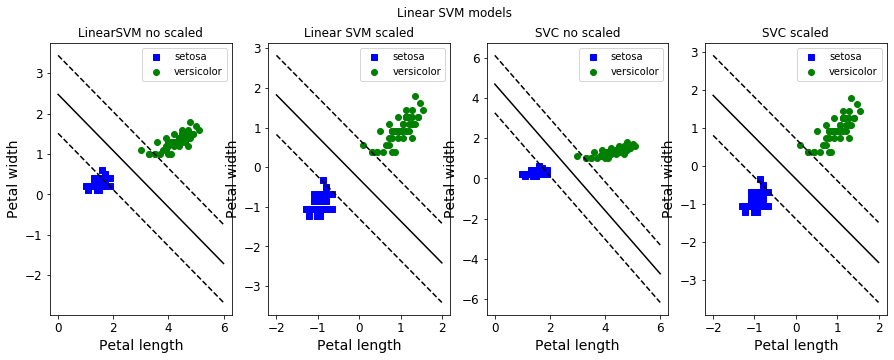

In [153]:
# porownanie modeli 

def plot_boundaries(plot_area,trainced_model,X,scaled):
    if(scaled):
        X=StandardScaler().fit_transform(X)
    xmax,xmin=np.ceil(np.max(X)),np.floor(np.min(X))
  
    for _name,model in trainced_model.steps:
        if 'intercept_' in model.__dict__ : 
            b=model.intercept_[0]
            w0,w1=model.coef_[0][0],model.coef_[0][1]
            break

    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.arange(xmin,xmax+0.1,0.1)   #zakladamy jako argument
    x1 = -w0/w1*x0 -b/w1                #to musimy obliczyc
    margin=1/w1

    plot_area.plot(x0,x1,'k')
    plot_area.plot(x0,x1-margin,'k--')
    plot_area.plot(x0,x1+margin,'k--')

def plot_setosa_versicolor(plot_area,plot_title,X,y,scaled):
    
    if(scaled):
        X=StandardScaler().fit_transform(X)

    X_patlen_setosa=X[:, 0][y==0]
    X_patwid_setosa=X[:, 1][y==0]
    X_patlen_versi=X[:, 0][y==1]
    X_patwid_versi=X[:, 1][y==1]

    plot_area.plot(X_patlen_setosa,X_patwid_setosa,'bs',label='setosa')
    plot_area.plot(X_patlen_versi,X_patwid_versi,'go',label='versicolor')
    plot_area.set_xlabel("Petal length", fontsize=14)
    plot_area.set_ylabel("Petal width", fontsize=14)
    plot_area.set_title(plot_title)
    plot_area.legend()

    # if(bvectors is not None):
    #     plt.scatter(bvectors[:, 0], bvectors[:, 1], s=180, facecolors='#FFAAAA')


svm_lin= Pipeline([('svm_lin',LinearSVC(loss='hinge',C=1))]) 
svm_lin_scaled = Pipeline([    ('scaler',StandardScaler()),    ('svm_lin',LinearSVC(loss='hinge',C=1))])
svm_kern=Pipeline([('svm_kern',SVC(kernel='linear',C=1))])
svm_kern_scaled = Pipeline([('scaler',StandardScaler()),('svm_kern',SVC(kernel='linear',C=1))])
for clasifier in [svm_lin,svm_lin_scaled,svm_kern,svm_kern_scaled]:
    clasifier.fit(X,y)

fig, axes = plt.subplots(ncols=4, figsize=(15,5), sharey=False)
fig.suptitle('Linear SVM models')
params = [
    (axes[0],svm_lin,'LinearSVM no scaled'),
    (axes[1],svm_lin_scaled,'Linear SVM scaled'),
    (axes[2],svm_kern,'SVC no scaled'),
    (axes[3],svm_kern_scaled,'SVC scaled')    ]
for area,model,title in params:
    plot_setosa_versicolor(area,title,X,y,scaled=('no scaled' not in title))
    plot_boundaries(area,model,X,scaled=('no scaled' not in title))
    # plot_boundaries(area,model,X=12)

# TODO: zrob jeszcze plot boundries

In [150]:
for a,b in svm_kern_scaled.steps:
    if 'intercept_' in b.__dict__ : 
        print(a, b.intercept_,b.coef_)
        break

svm_kern [0.32182521] [[1.04342638 0.94747825]]


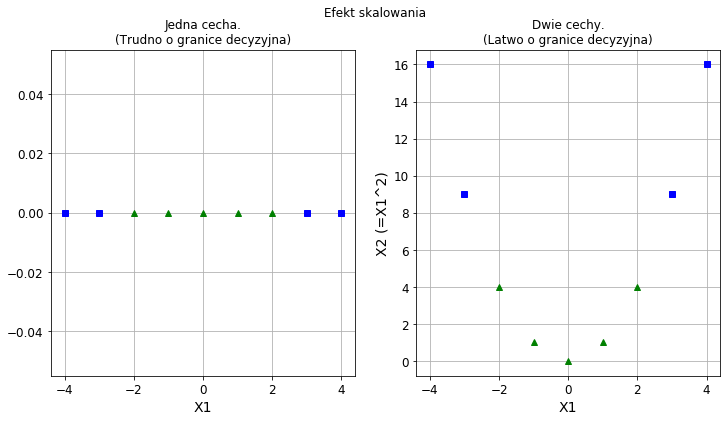

In [122]:

#wielomiany (make_moons)


X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

fig,(axis1,axis2) = plt.subplots(ncols=2,figsize=(12,6))
fig.suptitle('Efekt skalowania')
axis1.set_title('Jedna cecha.\n(Trudno o granice decyzyjna)')
axis1.plot(X1D[:,0][y==0],np.zeros(4),'bs')
axis1.plot(X1D[:,0][y==1],np.zeros(5),'g^')
axis1.set_xlabel('X1')
axis1.grid(True)
axis2.set_title('Dwie cechy.\n(Latwo o granice decyzyjna)')
axis2.plot(X2D[:,0][y==0],X2D[:,1][y==0],'bs')
axis2.plot(X2D[:,0][y==1],X2D[:,1][y==1],'g^')
axis2.set_xlabel('X1')
axis2.set_ylabel('X2 (=X1^2)')
axis2.grid(True)




C:\Users\dj6dvj\Anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


TypeError: plot_predictions() takes 2 positional arguments but 3 were given

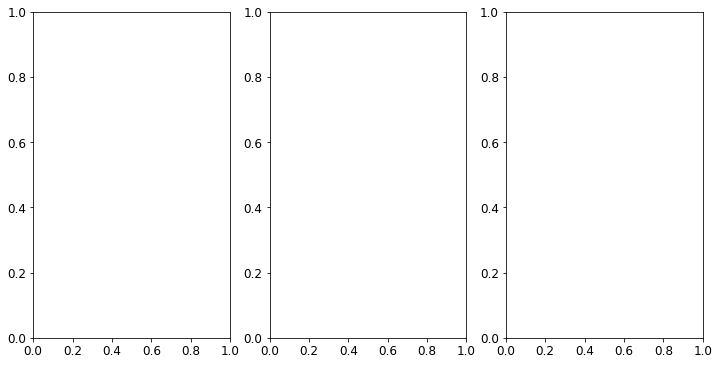

In [206]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

if ( '_MOONS_LOADED' not in globals()):
    X,y = make_moons(n_samples=100,noise=0.15)
    _MOONS_LOADED=True


#badamy czy to skalowanie potrzebne
model_scaled_poly = Pipeline([
    ('polynomials',PolynomialFeatures(degree=5)),
    ('scaler',StandardScaler()),
    ('Linear_SVC',LinearSVC(loss='hinge',C=10))
])

model = Pipeline([
    ('scaler',StandardScaler()),
    ('Linear_SVC',LinearSVC(loss='hinge',C=10))
])


model_scaled_poly.fit(X,y)
model.fit(X,y)

limits=[-1.5,2.5,-1,1.5]
x1s=np.linspace(limits[0],limits[1],100)#.reshape(-1,1)
x2s=np.linspace(limits[2],limits[3],100)#.reshape(-1,1)
x1s_m,x2s_m=np.meshgrid(x1s,x2s)
Xs=np.c_[x1s_m.ravel(),x2s_m.ravel()]
y_pred=model_scaled_poly.predict(Xs).reshape(x1s_m.shape)
y_dec=model_scaled_poly.decision_function(Xs).reshape(x1s_m.shape)

# plt.scatter(X[:,0][y==0],X[:,1][y==0])
# plt.scatter(X[:,0][y==1],X[:,1][y==1])
# plt.contourf(x1s,x2s,y_pred,alpha=0.1,cmap=plt.cm.brg)
# plt.contourf(x1s,x2s,y_dec,alpha=0.2,cmap=plt.cm.brg)
# plt.grid(True)




# model_scaled_poly.predict(y)

# svc_clf.coef_
# svc_clf.decision_function(X_scaled)


# print(X_sc)

#chyba trzeba podbic to w jakis sposob
def plot_predictions(axis,model):
    axes = [-1.5, 2.5, -1, 1.5]
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xs = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(Xs).reshape(x0.shape)
    y_decision = model.decision_function(Xs).reshape(x0.shape)
    axis.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    axis.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    axis.scatter(X[:,0][y==0],X[:,1][y==0])
    axis.scatter(X[:,0][y==1],X[:,1][y==1])

fig, axis = plt.subplots(1,3,figsize=(12,6))
degree=3
normalized=True

plot_predictions(axis[0], model_scaled_poly,degree)

#napisz dalej cala prezentacje


In [202]:
# X[:10],Xs[:10],
Xs[:,1]


array([-1. , -1. , -1. , ...,  1.5,  1.5,  1.5])

In [105]:
print(X[:10])
print(Xs[:10])

[[-0.15777792  1.1268219 ]
 [ 0.59382268  0.88264945]
 [ 0.91317203  0.44320442]
 [-0.32518366  0.86670365]
 [ 0.50936858  1.13471197]
 [ 0.07655829  0.8714524 ]
 [ 2.17252845  0.19262377]
 [ 0.73909155  0.8818899 ]
 [-0.20089501  0.99405656]
 [ 1.6134141   0.39029772]]
[[-1.5        -1.        ]
 [-1.45959596 -0.97474747]
 [-1.41919192 -0.94949495]
 [-1.37878788 -0.92424242]
 [-1.33838384 -0.8989899 ]
 [-1.2979798  -0.87373737]
 [-1.25757576 -0.84848485]
 [-1.21717172 -0.82323232]
 [-1.17676768 -0.7979798 ]
 [-1.13636364 -0.77272727]]
